# **Support Vector Boundary**




Isotropic data generator documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) \
Support vector classifier documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

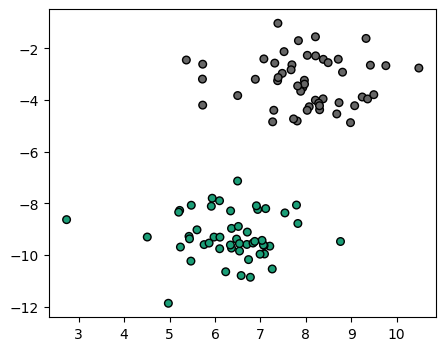

In [ ]:
# we create 40 separable points
X, y = make_blobs(n_samples = 100 , centers = 2 , n_features=2, random_state = 6)
_, ax= plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], c=y,  s=30 ,cmap="Dark2_r", edgecolors="k")

In [ ]:
clf = SVC(kernel = "linear")
clf.fit(X, y)


SVC(kernel='linear')

In [ ]:
offset =0.5
h_min, h_max = X[:, 0].min() - offset, X[:, 0].max() + offset
v_min, v_max = X[:, 1].min() - offset, X[:, 1].max() + offset
# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 100), np.linspace( v_min , v_max , 100))

# Predecir los valores del grid
pred_grid = clf.decision_function( np.c_[h_grid.ravel(), v_grid.ravel()] )
print (pred_grid.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape( h_grid.shape )
print (pred_grid.shape)

(10000,)
(100, 100)


[]

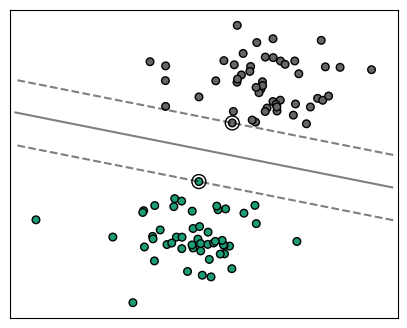

In [ ]:
_, ax= plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], c=y,  s=30 ,cmap="Dark2_r", edgecolors="k")

# plot decision boundary and margins
ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

ax.set_xlim(h_grid.min()-.1, h_grid.max()+.1)
ax.set_ylim(v_grid.min()-.1, v_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

In [ ]:
pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
pred_grid = pred_grid.reshape(h_grid.shape)

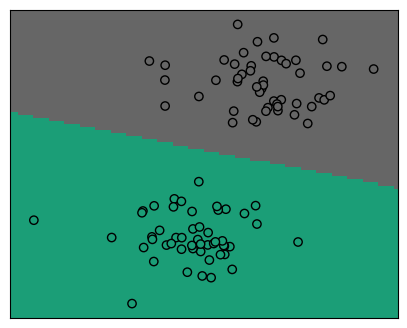

In [ ]:
_, ax = plt.subplots(figsize=(5,4))
ax.pcolormesh(h_grid, v_grid, pred_grid>0, cmap="Dark2_r")
ax.scatter(X[:,0], X[:,1], c=y, cmap="Dark2_r", edgecolors="k")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## In real data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris

In [ ]:
# import some data to play with
iris = load_iris()
X = iris.data[:, :2]   # Pick 2 features
Y = iris.target

In [ ]:
# Create an instance of SVM and fit the data.
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(kernel='linear')

(100, 100)


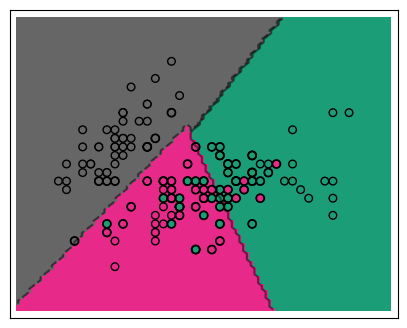

In [53]:
# Plot decision boundaries
offset = 0.5
h_min, h_max = X[:, 0].min() - offset, X[:, 0].max() + offset
v_min, v_max = X[:, 1].min() - offset, X[:, 1].max() + offset
# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 100), np.linspace(v_min, v_max, 100))

# Predecir los valores del grid
# Instead of decision_function, use predict to get class predictions directly
pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape(h_grid.shape)
print(pred_grid.shape)

_, ax = plt.subplots(figsize=(5, 4))
# Use Y (target variable) for color instead of y
ax.pcolormesh(h_grid, v_grid, pred_grid, cmap="Dark2_r")
ax.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap="Dark2_r", edgecolors="k")

# plot decision boundary and margins
# levels should match the number of classes
ax.contour(h_grid, v_grid, pred_grid, colors='k', levels=[0, 1, 2], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           linewidth=1, facecolors='none', edgecolors='k')

ax.set_xlim(h_grid.min() - .1, h_grid.max() + .1)
ax.set_ylim(v_grid.min() - .1, v_grid.max() + .1)

ax.set_xticks(())
ax.set_yticks(())
plt.show()
